# P1: Solve the OpenAI Gym [Taxi V3](https://gym.openai.com/envs/Taxi-v3/) Environment
---

## Introduction
[OpenAI Gym](https://gym.openai.com/docs/) is a framework that provides RL environments of varying complexity with the same standard API making it easy to develop and benchmark RL algorithms. The [Taxi-V3](https://gym.openai.com/envs/Taxi-v3/) environmnet present a simple, text environment where actions and state (observations) are both discrete. 

In [ ]:
import gym

The `gym.make()` API can be used to spawn any of the available environments by passing its full name.

In [ ]:
taxi = gym.make('Taxi-v3')

The Taxi environment has 500 states and 6 possible actions.

In [ ]:
taxi.action_space

Discrete(6)

In [ ]:
taxi.observation_space

Discrete(500)

The task and reward structure are described in the [documentation](https://github.com/openai/gym/blob/a5a6ae6bc0a5cfc0ff1ce9be723d59593c165022/gym/envs/toy_text/taxi.py#L25)

In [ ]:
taxi.reset()
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Submission
- Submit your solution as a Jupyter notebook. 
- Ensure that all cells in the notebook have been executed and the output is showing
- Ensure that your solution consistently reaches the average cumulative reward defined in the rubric (link below)
- Post your solution on Github and share the link to your commit as a direct message in Slack

Model Chosen: expected_sarsa


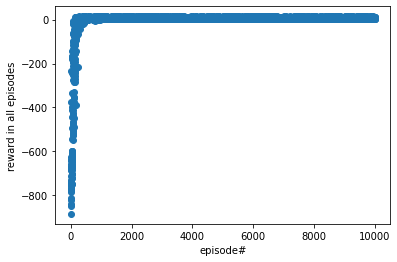

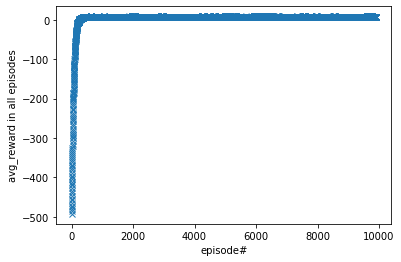

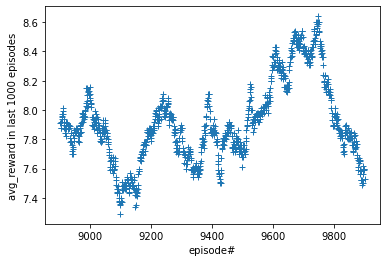

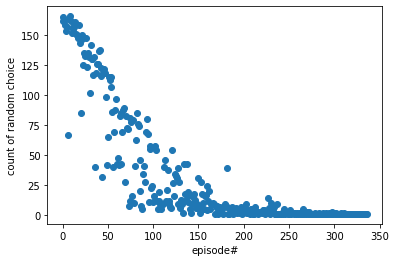

5th percentile: 7.49 True

95th percentile: 8.45 True

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

DEBUG = True
def run_model(method='qlearning'):
  print('Model Chosen: ' + method)
  alpha = 0.7
  gamma = .95
  nepisodes = 10000
  epsilon = 0.99
  max_epsilon = 1.0
  min_epsilon = 0.0
  decay_rate = .01

  nstate = taxi.observation_space.n
  nactions = taxi.action_space.n
  Q = np.zeros([nstate, nactions])
  
  pi = np.zeros_like(Q)
  for r in range(0,np.shape(pi)[0]):
    for c in range(0,np.shape(pi)[1]):
      pi[r,c] = 1/nactions
  
  reward_tracking = []
  random_tracking = []

  for episode in range(0, nepisodes+1):
    state = taxi.reset()
    total_reward = 0
    done = False
    random_ = 0
    
    while done != True:
      action = np.argmax(np.cumsum(pi[state,:]) > np.random.random())
      if action != np.argmax(Q[state]):
        random_ += 1
      
      next_state, reward, done, info = taxi.step(action)

      if method == 'qlearning':
        Q[state, action] = (1-alpha) * Q[state, action] \
                            + alpha*(reward + gamma*np.max(Q[next_state]))
      elif method == 'sarsa':
        next_action = np.argmax(np.cumsum(pi[next_state,:]) > np.random.random())
        Q[state, action] = (1-alpha) * Q[state, action] \
                            + alpha*(reward + gamma*Q[next_state, next_action])
      elif method == 'expected_sarsa':
        Q[state, action] = (1-alpha) * Q[state, action] \
                            + alpha*(reward \
                            + gamma*np.dot(Q[next_state, :], pi[next_state, :]))
        
      # update pi
      best_action = np.random.choice(np.where(Q[state] == np.max(Q[state]))[0])
      for a in range(0, nactions):
        if a == best_action:
          pi[state, a] = 1 - (nactions-1)*(epsilon/nactions)
        else:
          pi[state, a] = (epsilon/nactions)

      total_reward += reward
      state = next_state

    reward_tracking.append(total_reward)  
    #epsilon *= epsilon
    if random_ > 0:
      random_tracking.append(random_)
    epsilon = min_epsilon \
              + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    #gamma = 0.95*gamma
    

  avg_reward = np.convolve(reward_tracking, np.ones(100)/100, mode='valid')
  if DEBUG:
    plt.plot(range(0,len(reward_tracking[:])), reward_tracking[:], 'o')
    plt.xlabel('episode#')
    plt.ylabel('reward in all episodes')
    plt.show()

    plt.plot(range(0,len(avg_reward[:])), avg_reward[:], 'x')
    plt.xlabel('episode#')
    plt.ylabel('avg_reward in all episodes')
    plt.show()

    plt.plot(range(0,len(avg_reward))[-1000:], avg_reward[-1000:], '+')
    plt.xlabel('episode#')
    plt.ylabel('avg_reward in last 1000 episodes')
    plt.show()

    plt.plot(range(0,len(random_tracking[:])), random_tracking[:], 'o')
    plt.xlabel('episode#')
    plt.ylabel('count of random choice')
    plt.show()


    print('5th percentile: %.2f %r\n' \
          % (np.percentile(avg_reward[-1000:], 5), \
             np.percentile(avg_reward[-1000:], 5) > 7.2))
    print('95th percentile: %.2f %r\n' \
          % (np.percentile(avg_reward[-1000:], 95), \
             np.percentile(avg_reward[-1000:], 95) > 8.2))

  return Q, ((np.percentile(avg_reward[-1000:], 5) > 7.2) \
             and (np.percentile(avg_reward[-1000:], 95) > 8.2))

vec = []
for k in range(0, 1):
  Q, result = run_model('expected_sarsa')
  vec.append(result)
  
  state = taxi.reset()
  done = None
  taxi.render()
  while done != True:
    action = np.argmax(Q[state])
    state, reward, done, info = taxi.step(action)
    taxi.render()

print('Pass percentage: %0.2f\n' % (sum(vec)//len(vec)*100))



## Evaluation
The goal of the project is to get a certain average (cumulative) reward over 100 episodes. To pass the project, you must meet all the requirments in the project [rubric](https://github.com/KnowchowHQ/rl-in-action/blob/master/C1-RL-Intro/W3OH/P1-rubric.md)